# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

The objective of the problem is to identify the key features that impact the prices of the used car. We would want to gain useful insights on how they negatively or positively drive the price of the car by looking for the top features that are positively and negatively correlated with the car price. The goal is to train and evaluate different regression models, fine tuning them using hyperparameters to idenitfy the relationship between the different variables in the data and predict the car price. 

We will need to use the test and validation datasets to determine the best regression models and identify the key features with accuracy.

By understanding accurately what features the customer value more, the used car dealer can gain more leverage and adjust the car prices to increase sales revenues and be more profitable.

Our results should demonstrate the potential of algorithms to improve the sales of used car dealership and help with their inventory management. In our analysis, we focus on the price as our primary measure of quality. Our goal is to maximize the sales of used cares selected in the process.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Since the provided data was is not clean, we will need to fill in missing data, remove unnecessary columns and unusable data entries,     

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

import datetime
import seaborn as sns
%matplotlib inline
import os
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from sklearn.compose import make_column_transformer, TransformedTargetRegressor, ColumnTransformer
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.inspection import permutation_importance
from sklearn.model_selection import cross_val_score
import io

from math import sqrt
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("data/vehicles.csv")
df.tail()

In [142]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [144]:
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [145]:
#Distribution of cyclinder
df["cylinders"].value_counts()

cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64

In [146]:
df['transmission'].value_counts()

transmission
automatic    336524
other         62682
manual        25118
Name: count, dtype: int64

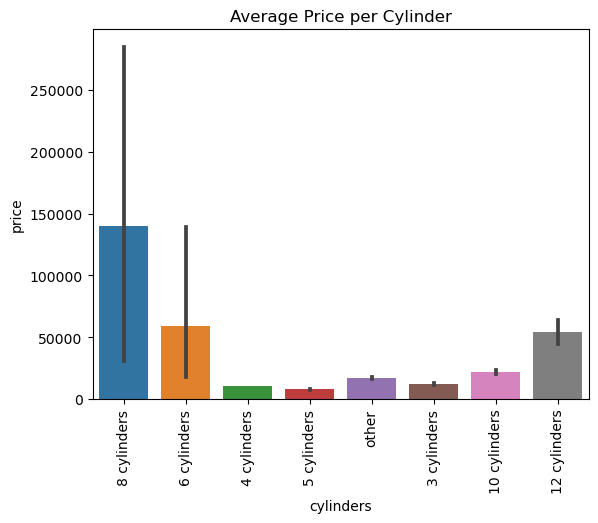

In [147]:
#Plot graphs for various columns vs price to visualize the correlation
plt.title('Average Price per Cylinder')
sns.barplot(data=df, x='cylinders', y='price')
plt.xticks(rotation=90)
plt.show()

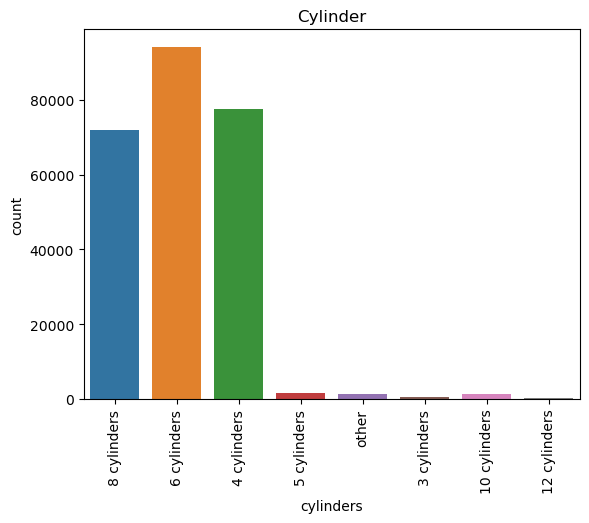

In [148]:
#Plot countplot for cyclinders
plt.title('Cylinder')
sns.countplot(data=df, x='cylinders')
plt.xticks(rotation=90)
plt.show()

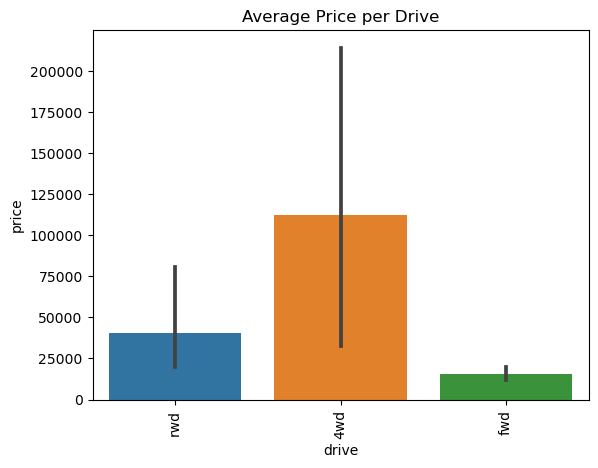

In [149]:
#Plot graphs for various columns vs price to visualize the correlation
plt.title('Average Price per Drive')
sns.barplot(data=df, x='drive', y='price')
plt.xticks(rotation=90)
plt.show()

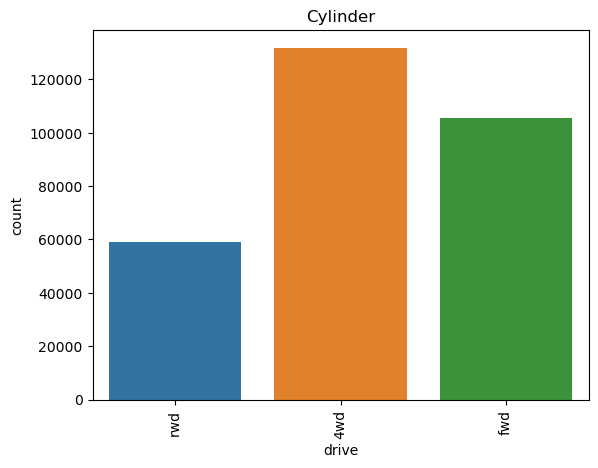

In [150]:
#Plot countplot for Drive
plt.title('Cylinder')
sns.countplot(data=df, x='drive')
plt.xticks(rotation=90)
plt.show()

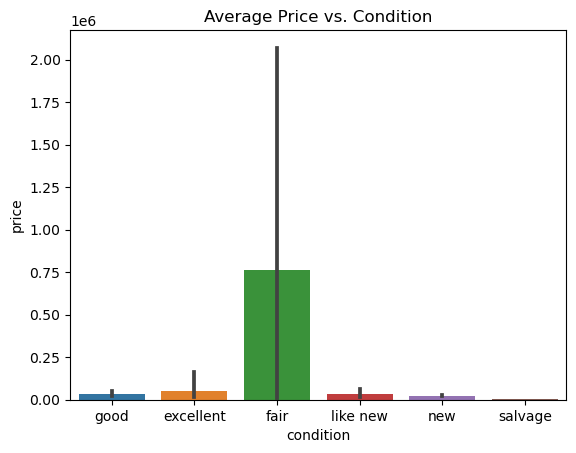

In [151]:
plt.title('Average Price vs. Condition')
sns.barplot(data=df, x='condition', y='price')
plt.show()

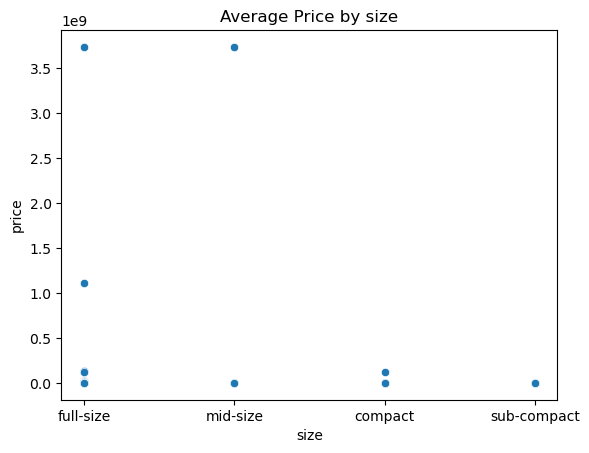

In [152]:
plt.title('Average Price by size')
sns.scatterplot(data=df, x='size', y='price')
plt.show()

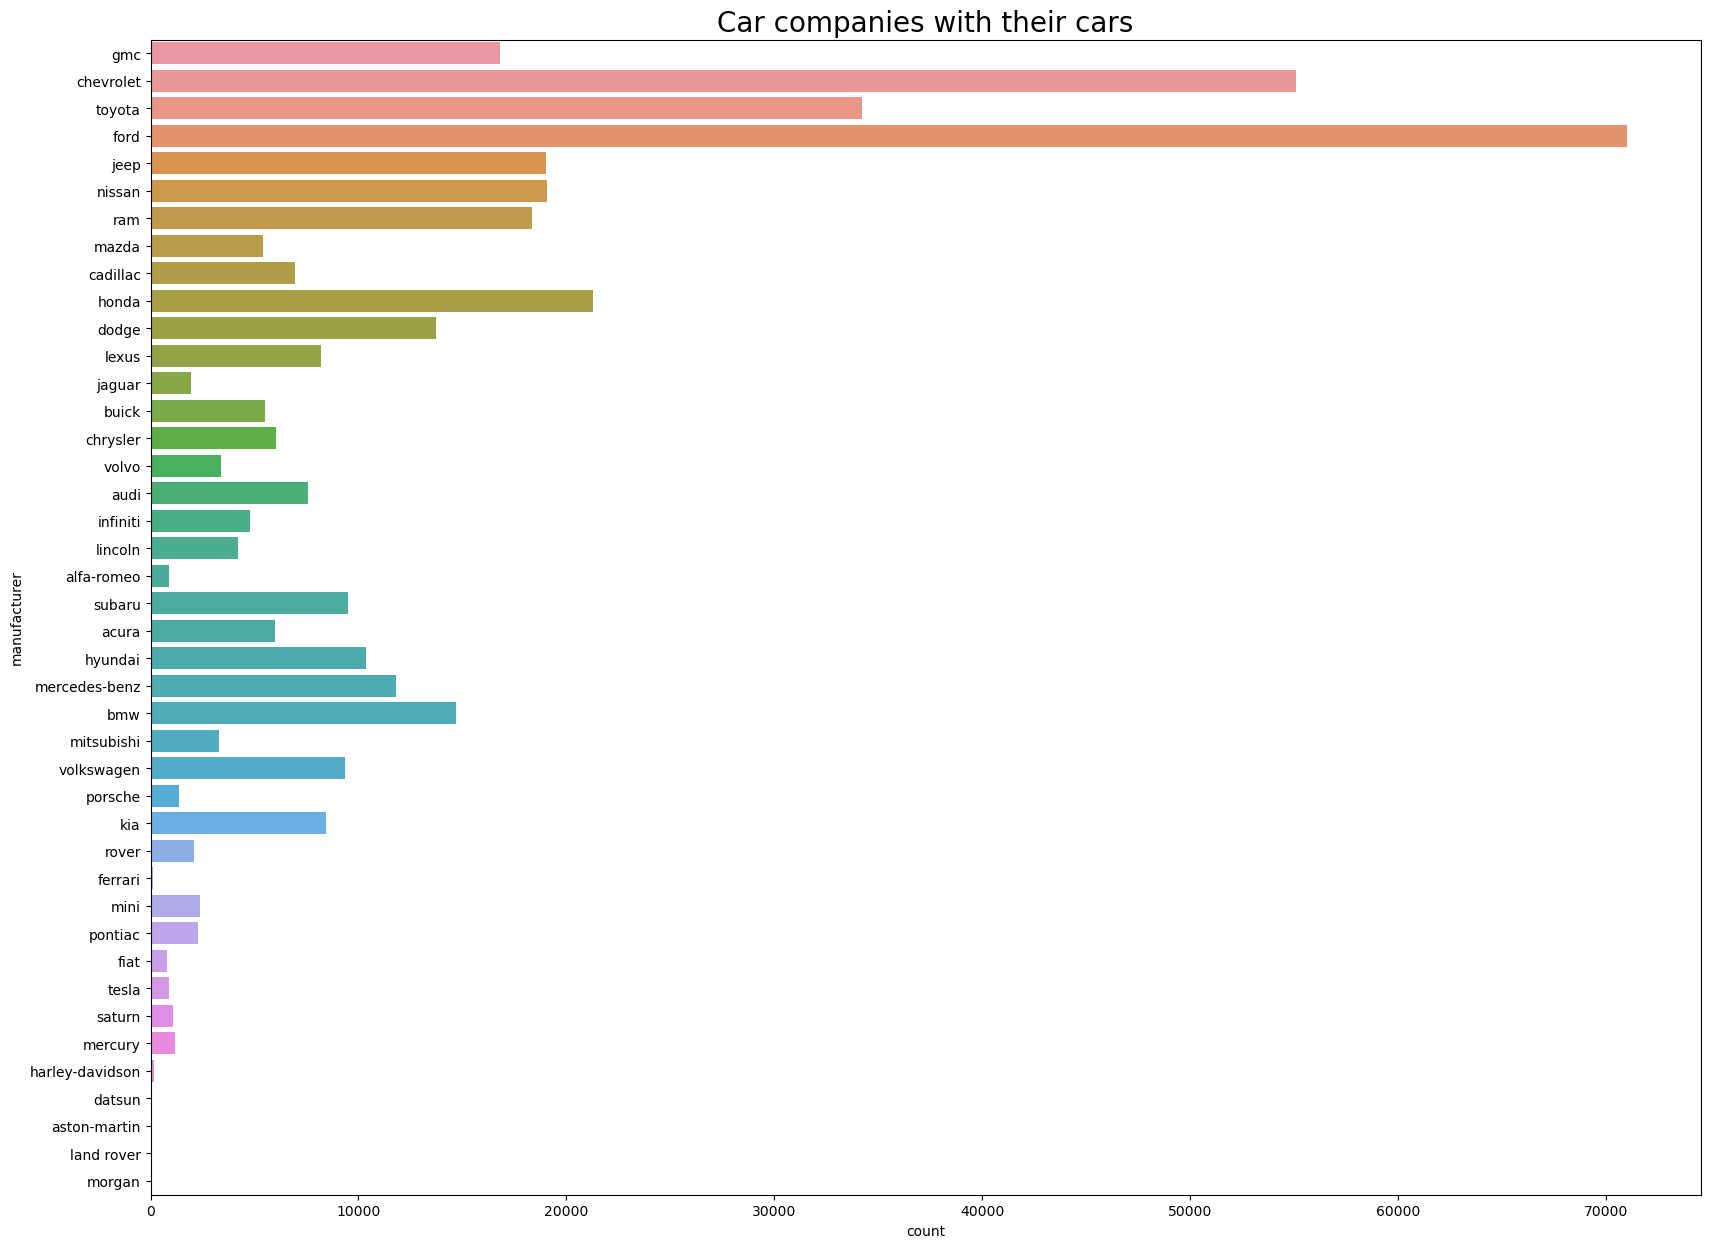

In [153]:
plt.figure(figsize = (20, 15))
sns.countplot(y = df.manufacturer)
plt.title("Car companies with their cars", fontsize = 20)
plt.show()

In [154]:
# Check unique values in each column
df.nunique()

id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

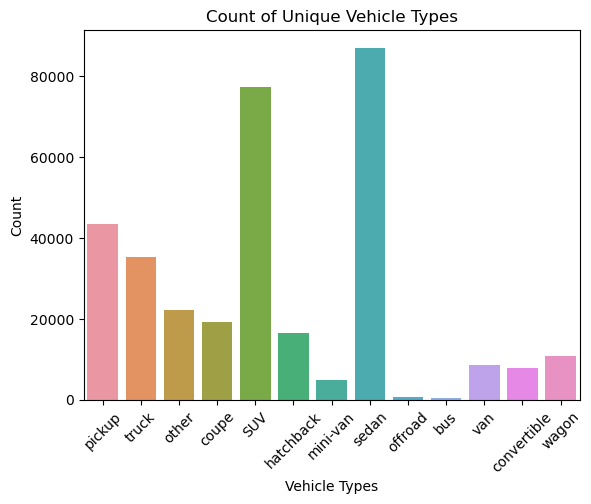

In [155]:
fig = sns.countplot(x="type", data=df)

fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
plt.xlabel("Vehicle Types")
plt.ylabel("Count")
plt.title("Count of Unique Vehicle Types")

plt.savefig('images/v_typesx.png')
plt.show()

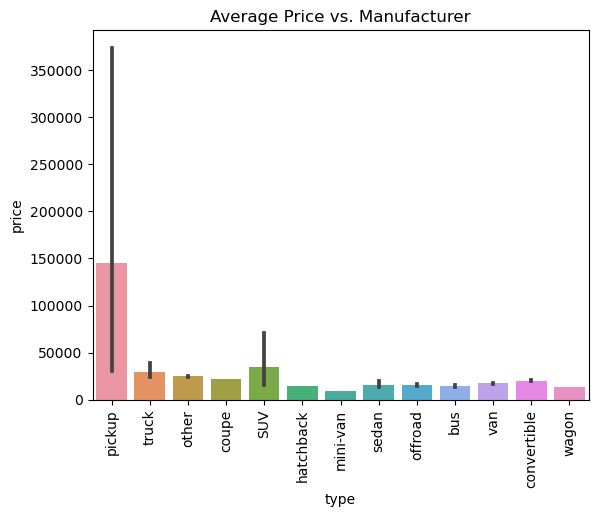

In [156]:
plt.title('Average Price vs. Manufacturer')
sns.barplot(data=df, x='type', y='price')
plt.xticks(rotation=90)
plt.show()

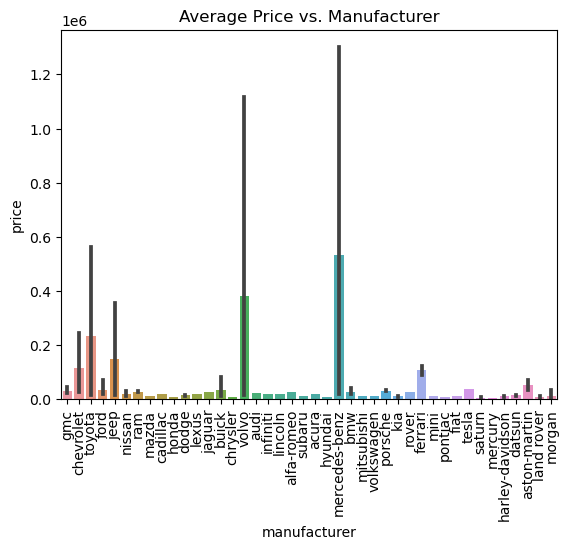

In [157]:
plt.title('Average Price vs. Manufacturer')
sns.barplot(data=df, x='manufacturer', y='price')
plt.xticks(rotation=90)
plt.show()

<Axes: title={'center': 'Average Price per Odometer Range'}, xlabel='odometer', ylabel='price'>

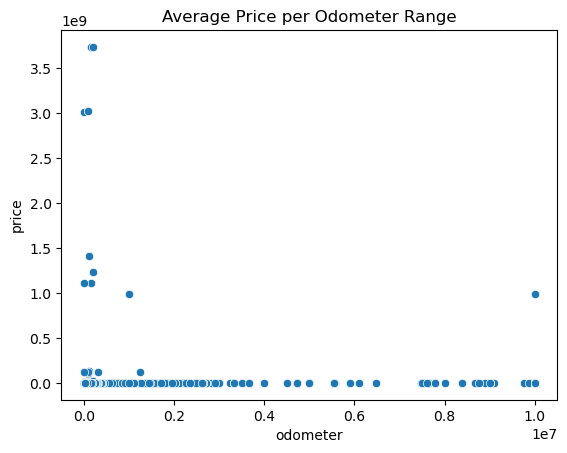

In [158]:
plt.title('Average Price per Odometer Range')
sns.scatterplot(data=df, x='odometer', y='price')

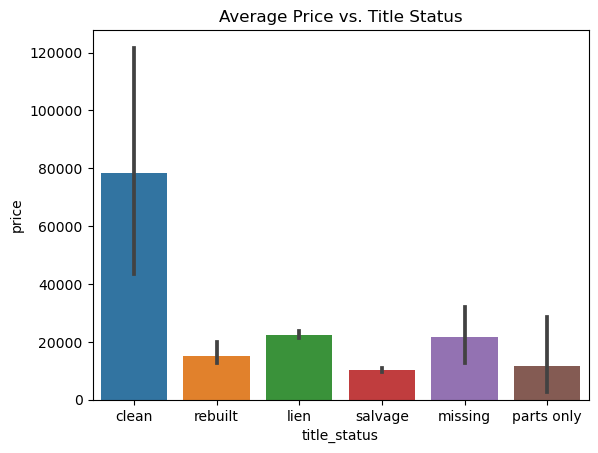

In [159]:
plt.title('Average Price vs. Title Status')
sns.barplot(data=df, x='title_status', y='price')
plt.show()

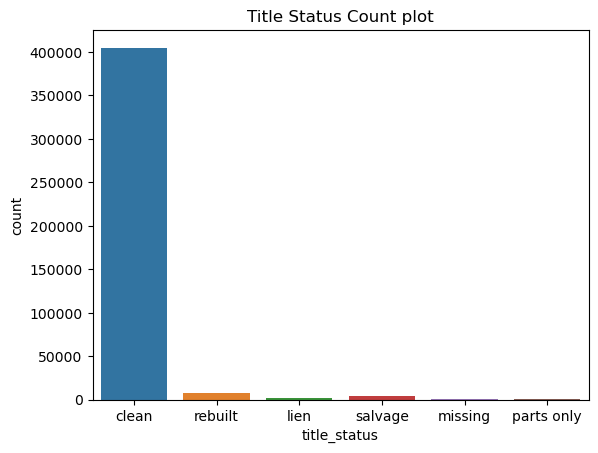

In [160]:
plt.title('Title Status Count plot')
sns.countplot(data=df, x='title_status',)
plt.show()

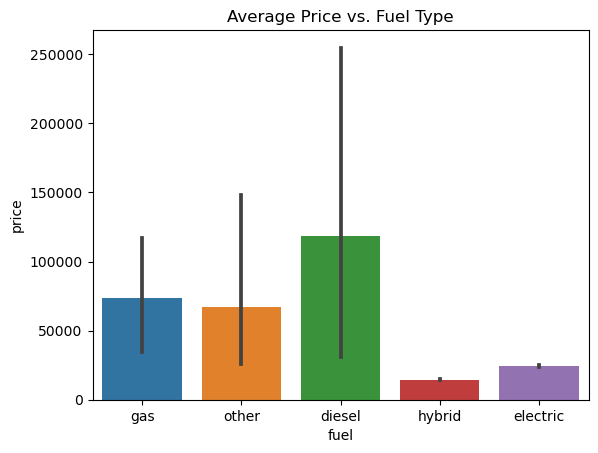

In [161]:
plt.title('Average Price vs. Fuel Type')
sns.barplot(data=df, x='fuel', y='price')
plt.show()

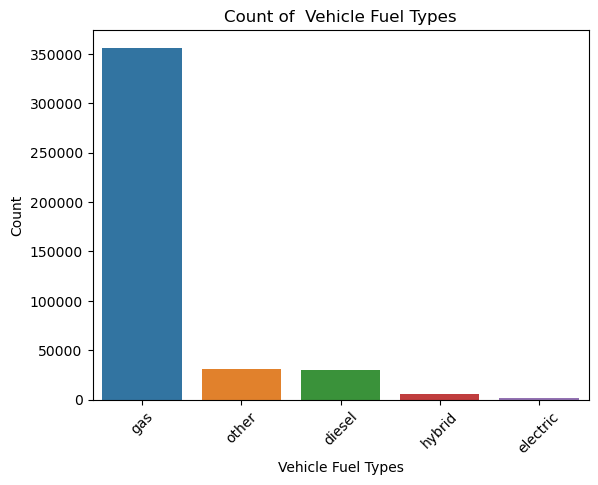

In [162]:
fig = sns.countplot(x="fuel", data=df)

fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
plt.xlabel("Vehicle Fuel Types")
plt.ylabel("Count")
plt.title("Count of  Vehicle Fuel Types")
plt.show()

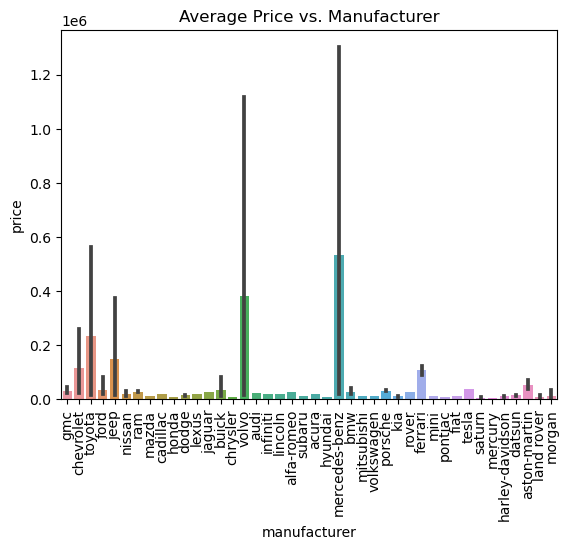

In [163]:
plt.title('Average Price vs. Manufacturer')
sns.barplot(data=df, x='manufacturer', y='price')
plt.xticks(rotation=90)
plt.show()

[Text(0.5, 1.0, 'Box Plot of Price of used cars')]

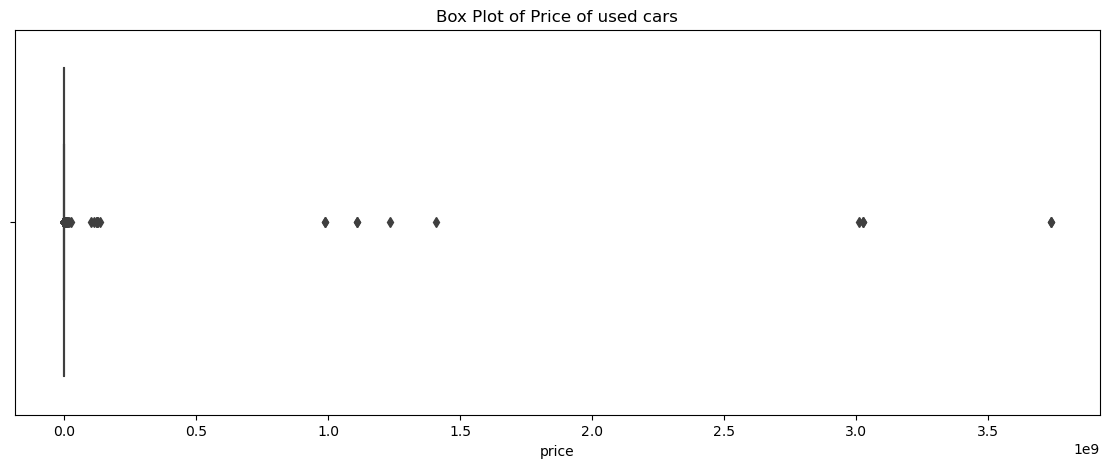

In [164]:
#box plot of 'price' for outlier detection
plt.figure(figsize=(14,5))
sns.boxplot(data=df,x='price').set(title="Box Plot of Price of used cars")


[Text(0.5, 1.0, 'Box Plot of Year of used cars')]

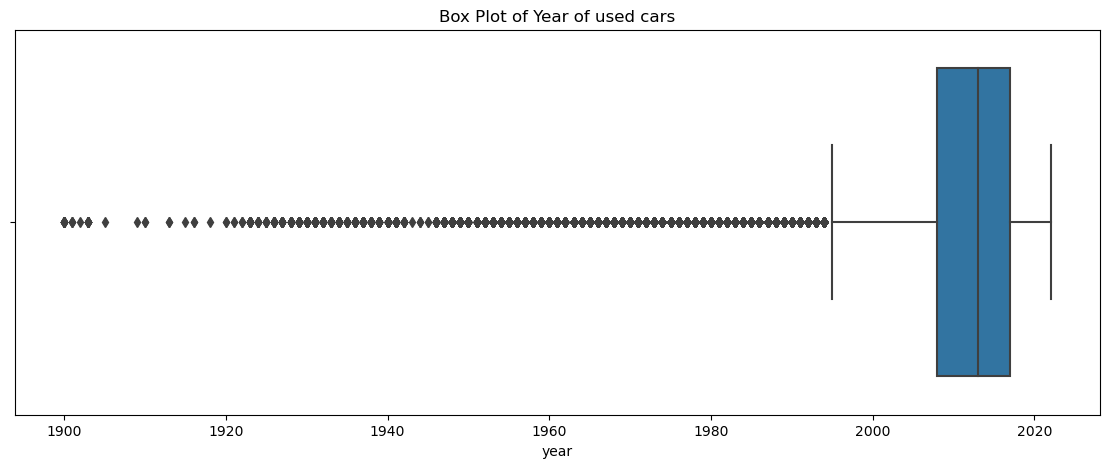

In [165]:
#box plot of 'year' to detect outlier
plt.figure(figsize=(14,5))
sns.boxplot(data=df,x='year').set(title="Box Plot of Year of used cars")

[Text(0.5, 1.0, 'Box Plot of Odometer')]

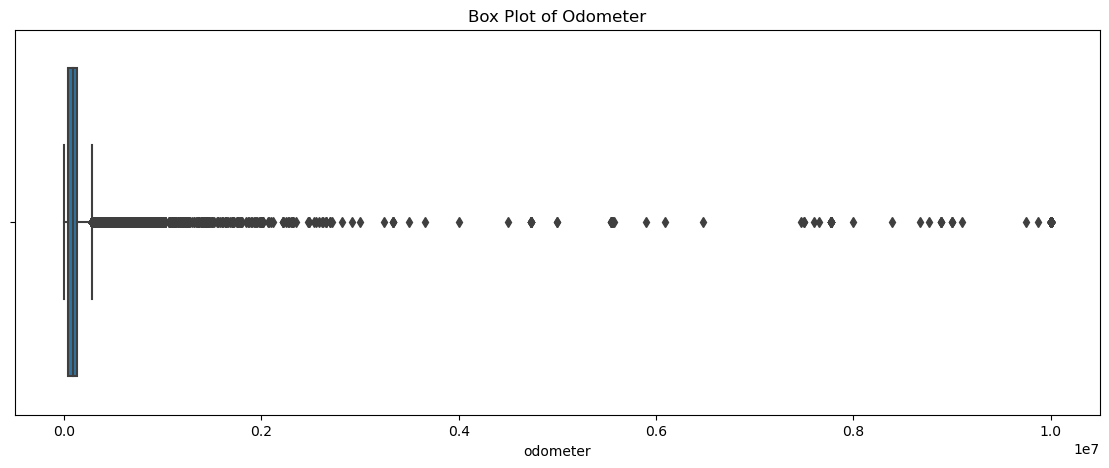

In [166]:
#box plot of 'Odometer' to detect outlier
plt.figure(figsize=(14,5))
sns.boxplot(data=df,x='odometer').set(title="Box Plot of Odometer")

In [167]:
#Explore the object features
df_ = df.select_dtypes(exclude=['int', 'float'])
for col in df_.columns:
    print('\n-----------\n')
    print(df_[col].nunique())
    print(df_[col].unique()) # to print categories name only
    print(df_[col].value_counts()) # to print count of every category


-----------

404
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville' 'ventura county'
 'visalia-tulare' 'yuba-sutter' 'boulder' 'colora

From the initial analysis of the dataset , here are some of the observations seen that affect the car prices:
1. There is a negative correlation between price and distance travelled ( odometer) in the car, the lower the range the higher the price.

2. There is a lot of inventory of Toyota, Chevrolet and Ford sold in the used-car segment, indicating high powered trucks are popular choice compared to luxury vehicles in the used car market. Sedans and SUV are among the most popular models with a large number of resales. SUV and pickup's are more expensive.

3. However Mercedes,Volvo, Toyota and Jeep are sold at a drastically higher price as compared the other models.

4. 8 and 4 and 6 cyclinder cars are most popular , with 8 cyclinders being much more expensive that the others.

5. Diesel cars are more expensive compared to gas cars. However, gas cars are hands down the most sold in the inventory than diesel or electric.


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

Column Removal:

We removed the "VIN" column since it didn't provide any valuable information for price prediction. Additionally, the "state" column was dropped as it duplicated information already present in the "region" column.
Handling Missing Values:

To address missing values in categorical columns, we employed several regression estimators like BayesianRidge, DecisionTreeRegressor, ExtraTreesRegressor, and KNeighboursRegressor. After evaluating their performance, BayesianRidge yielded the lowest Mean Squared Error (MSE), and we used it to impute missing values in categorical columns.
Outlier Detection and Removal:

Outliers were identified in the "Price," "Odometer," and "Year" columns using the Interquartile Range (IQR) method.
A total of 62,427 rows were removed during the outlier removal process for these columns.
    

Data cleaning methods applied to the cars dataset
1. Replace Nan values
2. Remove any duplicates
3. Drop columns
4. Drop na values

Convert the year column into the age of the car
Drop the columns unused for machine learning

1. Dropping Features

VIN and id are not relevant in determining car prices. Therefore, these features can be safely dropped.

Dropping features with missing data / not worth including:
Size of car could be a good predictor for car price, however almost 70% of data missing for size feature in the dataset.

Region feature has 404 unique values with each category having less that 1% of total count. Given this distribution, we can drop this feature.
State and Model also exhibits similar characteristics to Region mentioned above, hence not including these features too.

In [168]:
# Dropping ID and VIN since it does not affect car prices, also dropping the state and region from the analysis.
data_df = df.drop(columns=['id', 'model', 'VIN', 'state','size','region'], axis=1)
data_df.reset_index(inplace=True, drop = True)
data_df


,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,NaN
426876,30590,2020.0,volvo,good,NaN,gas,12029.0,clean,other,fwd,sedan,red
426877,34990,2020.0,cadillac,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,white
426878,28990,2018.0,lexus,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,silver


In [169]:
# Dropping rows with null values
data_df = data_df.dropna()

Create new feature 'age' feature from 'year'

In [170]:
# convert the year column into the age column (2021 because that was when the dataset was released) 
current_year = 2022
data_df['age'] = current_year - data_df['year']
data_df.drop(columns = ['year'], inplace = True)

# drop unnecessary columns
data_df

,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,age
31,15000,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,truck,black,9.0
32,27990,gmc,good,8 cylinders,gas,68696.0,clean,other,4wd,pickup,black,10.0
33,34590,chevrolet,good,6 cylinders,gas,29499.0,clean,other,4wd,pickup,silver,6.0
34,35000,toyota,excellent,6 cylinders,gas,43000.0,clean,automatic,4wd,truck,grey,3.0
35,29990,chevrolet,good,6 cylinders,gas,17302.0,clean,other,4wd,pickup,red,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
426859,48590,cadillac,good,6 cylinders,gas,7701.0,clean,other,fwd,other,black,2.0
426860,39990,infiniti,good,8 cylinders,gas,41664.0,clean,automatic,4wd,other,black,5.0
426866,32990,infiniti,good,8 cylinders,gas,55612.0,clean,automatic,rwd,other,black,6.0
426874,33590,lexus,good,6 cylinders,gas,30814.0,clean,automatic,rwd,sedan,white,4.0


Convert condition and cylinders categorical features into numerical features while preserving ordinal ranking

In [171]:
map_condition = {'new': 5, 'like new': 4, 'excellent': 3, 'good' : 2, 'fair' : 1, 'salvage': 0}
map_cylinders = {'12 cylinders' : 12, '10 cylinders' : 10, '8 cylinders' : 8, '6 cylinders' : 6, '5 cylinders' : 5, '4 cylinders' : 4, '3 cylinders' : 3, 'other': 1}

In [172]:
data_df['condition'] = data_df['condition'].map(map_condition)

In [173]:
data_df['cylinders'] = data_df['cylinders'].map(map_cylinders)

Removing samples with car prices equal to 0

In [174]:
# Filter out car price equal to 0
data_df = data_df[data_df['price'] != 0]


One hot encode categorical features

In [175]:
ohe_features = ['manufacturer', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color']

df_final = pd.get_dummies(data_df, columns=ohe_features)

In [176]:
df_final

,price,condition,cylinders,odometer,age,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
31,15000,3,6,128000.0,9.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32,27990,2,8,68696.0,10.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33,34590,2,6,29499.0,6.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
34,35000,3,6,43000.0,3.0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
35,29990,2,6,17302.0,6.0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,48590,2,6,7701.0,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
426860,39990,2,8,41664.0,5.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
426866,32990,2,8,55612.0,6.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
426874,33590,2,6,30814.0,4.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


Remove Outliers for price and odometer features

Features like odometer and price have huge range of values.The aim is to choose a subset of the data that will be sufficient for predicting car prices and remove outliers that can skew the result. 

We look at the min, median, and max values for each respective feature and explore the lower bound and upper bounds using IQR.



In [177]:
# Maximum, Minimum, Std dev and Mean value of price in the dataframe df_price_out1
print('Max:', data_df['price'].max())
print('Min:', data_df['price'].min())
print('Mean:', data_df['price'].mean())
print('Std. Dev.:', data_df['price'].std())

# Exploring lower bound and upper bound using Interquartile Range (IQR)  
Q1 = data_df['price'].quantile(0.25)
Q3 = data_df['price'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound_price = Q1 - 1.5 * IQR
upper_bound_price = Q3 + 1.5 * IQR

# Filter the DataFrame to retain only values within the lower and upper bounds
print('Lower bound: ', lower_bound_price)
print('Upper bound: ', upper_bound_price)

Max: 3736928711
Min: 1
Mean: 63181.27946913011
Std. Dev.: 11627111.074620418
Lower bound:  -20242.5
Upper bound:  49737.5


In [ ]:
#Drop any observation outside of 3x std. dev. 
df_price_out2 = data_df[(data_df['price'] < 200000) & (data_df['price'] > 0)]


[Text(0.5, 1.0, 'Box Plot of Price of used cars in the dataset after eliminating outliers')]

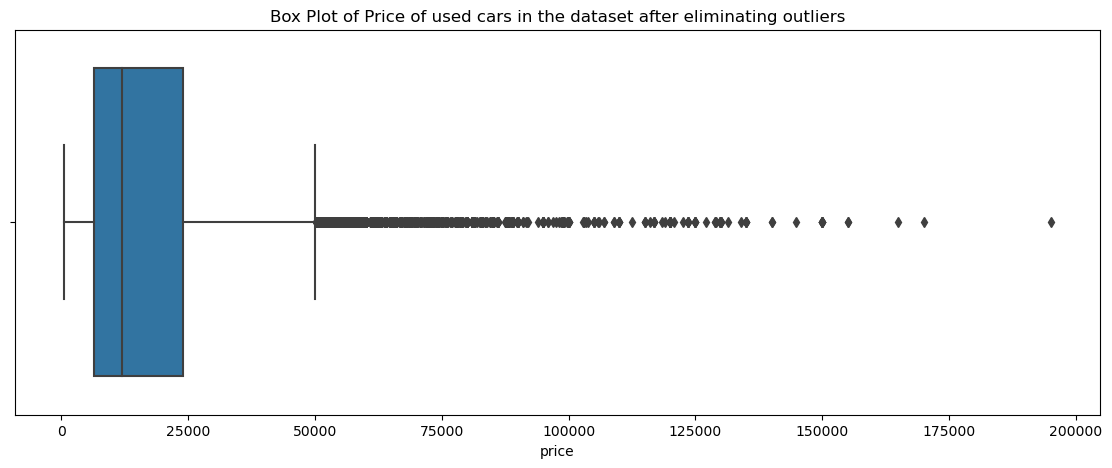

In [ ]:
#box plot of 'price' after outlier elimination
plt.figure(figsize=(14,5))
sns.boxplot(data=df_price_out2,x='price').set(title="Box Plot of Price of used cars in the dataset after eliminating outliers")

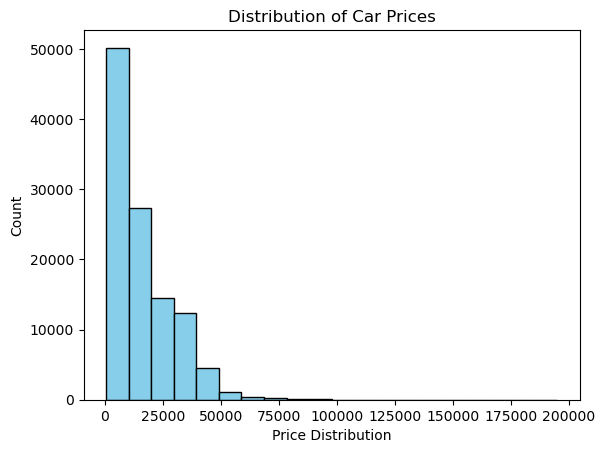

In [181]:
# Visualizing distribution of Car Prices after removing outliers
df_price_out2['price'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price Distribution')
plt.ylabel('Count')
plt.title('Distribution of Car Prices')
plt.show()

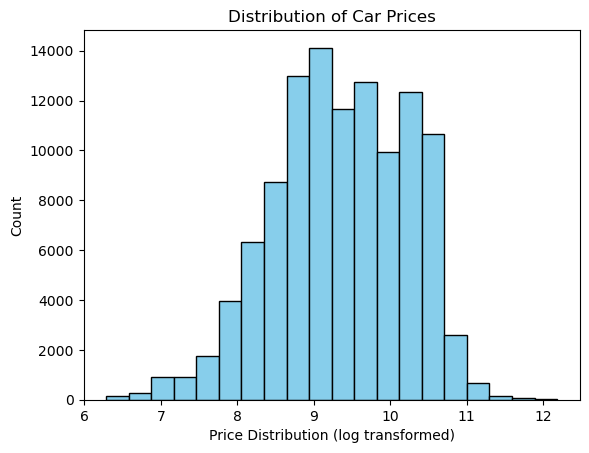

In [182]:
# Applying log transformation and viewing distribution
np.log(df_price_out2['price']).plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Price Distribution (log transformed)')
plt.ylabel('Count')
plt.title('Distribution of Car Prices')
plt.show()

In [183]:
data_df_clean1 = df_price_out2

In [184]:
#Drop any observation outside of 500 000km 
df_odom_out1 = data_df_clean1
# Maximum, Minimum, Std dev and Mean value of odometer in the dataframe df1
print('Max:', df_odom_out1['odometer'].max())
print('Min:', df_odom_out1['odometer'].min())
print('Mean:', df_odom_out1['odometer'].mean())
print('Median:', df_odom_out1['odometer'].median())
print('Std. Dev.:', df_odom_out1['odometer'].std())

# Exploring lower bound and upper bound using Interquartile Range (IQR)   
Q1 = data_df_clean1['odometer'].quantile(0.25)
Q3 = data_df_clean1['odometer'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound_odometer = Q1 - 1.5 * IQR
upper_bound_odometer = Q3 + 1.5 * IQR

# Filter the DataFrame to retain only values within the lower and upper bounds
print('Lower bound: ', lower_bound_odometer)
print('Upper bound: ', upper_bound_odometer)


Max: 10000000.0
Min: 0.0
Mean: 111928.60247456496
Median: 104000.0
Std. Dev.: 192920.32996365963
Lower bound:  -82335.0
Upper bound:  287801.0


In [185]:
#Drop any observation outside of 3x std. dev. 
df_odom_out2 = df_odom_out1[(df_odom_out1['odometer'] < upper_bound_odometer)]


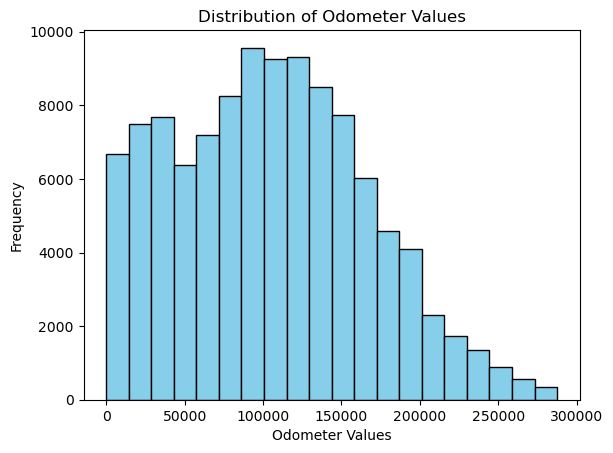

In [186]:
# Visualizing distribution of odometer after removing outliers
df_odom_out2['odometer'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Odometer Values')
plt.ylabel('Frequency')
plt.title('Distribution of Odometer Values')
plt.show()

[Text(0.5, 1.0, 'Box Plot of odometer of used cars in the dataset')]

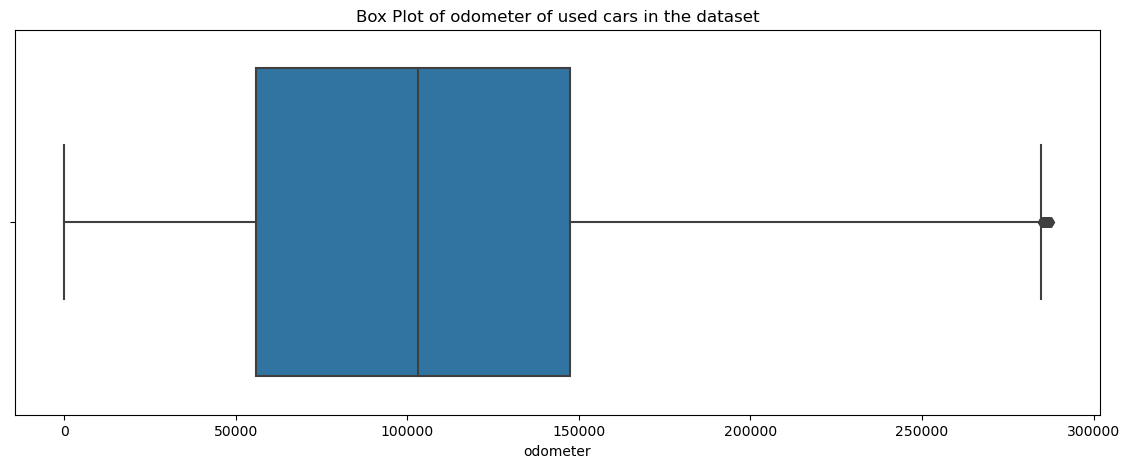

In [187]:
#box plot of 'year' to visualize outliers
plt.figure(figsize=(14,5))
sns.boxplot(data=df_odom_out2,x='odometer').set(title="Box Plot of odometer of used cars in the dataset")


In [188]:
#Rename final dataframe to something more meaningful
df_clean = df_odom_out2

In [189]:
df_clean.head()


,price,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,age
31,15000,ford,3,6,gas,128000.0,clean,automatic,rwd,truck,black,9.0
32,27990,gmc,2,8,gas,68696.0,clean,other,4wd,pickup,black,10.0
33,34590,chevrolet,2,6,gas,29499.0,clean,other,4wd,pickup,silver,6.0
34,35000,toyota,3,6,gas,43000.0,clean,automatic,4wd,truck,grey,3.0
35,29990,chevrolet,2,6,gas,17302.0,clean,other,4wd,pickup,red,6.0


In [190]:
#Get percentage of null values present for each feature
df_clean.isna().sum()/df_clean.shape[0]*100

price           0.0
manufacturer    0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
age             0.0
dtype: float64

In [191]:
df_final

,price,condition,cylinders,odometer,age,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
31,15000,3,6,128000.0,9.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
32,27990,2,8,68696.0,10.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
33,34590,2,6,29499.0,6.0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
34,35000,3,6,43000.0,3.0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
35,29990,2,6,17302.0,6.0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426859,48590,2,6,7701.0,2.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
426860,39990,2,8,41664.0,5.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
426866,32990,2,8,55612.0,6.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
426874,33590,2,6,30814.0,4.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

### In this section, we will be building three models to compare and use the best model to get the feature importance for used car prices.

1. Linear Regression 
2. Lasso Regression with GridSearchCV
3. Ridge Regression with GridSearchCV

In [192]:

X = df_final.drop(columns = ['price'])
y = df_final['price']
    

#split the dataset into training set and test set
# Applying log transformation to target variable to reduce skewness
X_train, X_test, y_train, y_test = train_test_split(X, np.log(y), random_state = 42, shuffle=True);


In [193]:
X_train

,condition,cylinders,odometer,age,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
1093,2,6,186500.0,27.0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
78392,3,8,84277.0,11.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
159563,2,4,48535.0,7.0,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
275300,3,4,31444.0,14.0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
229763,3,6,50100.0,6.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285403,2,4,105099.0,9.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
418593,3,4,68319.0,10.0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
388539,3,6,64329.0,12.0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3669,4,6,147909.0,12.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## 1. Linear Regression

In [194]:
#Building a pipeline for the linear regression

Linear_pipe =  Pipeline([('scaler', StandardScaler()),
                     ('linear', LinearRegression())])


#Perform Linear regression on the data

Linear_pipe.fit(X_train, y_train)
train_predict=Linear_pipe.predict(X_train)
test_predict=Linear_pipe.predict(X_test)


#Regression Error
Linear_train_mse = mean_squared_error(train_predict, y_train)
Linear_test_mse = mean_squared_error(test_predict, y_test)
Linear_train_mae = mean_absolute_error(train_predict, y_train)
Linear_test_mae = mean_absolute_error(test_predict, y_test)


#Check
linear_coefs = Linear_pipe.named_steps['linear'].coef_
print(Linear_pipe)
print(linear_coefs)  

print(f"Linear Model: train_mse={Linear_train_mse}, test_mse={Linear_test_mse}")
print(f"Linear Model: train_mae={Linear_train_mae}, test_mae={Linear_test_mae}")
print(Linear_pipe.score(X_test, y_test))

Pipeline(steps=[('scaler', StandardScaler()), ('linear', LinearRegression())])
[ 1.41671758e-01  1.68123049e-02 -1.12170314e-01 -2.77853907e-01
  8.19045296e+09  1.65117957e+09  6.07100520e+08  8.10635657e+09
  1.30607713e+10  9.21101535e+09  9.66604465e+09  2.84074416e+10
  1.02220446e+10  1.05146679e+09  1.48029855e+10  9.78873884e+08
  2.97215066e+09  3.02259311e+10  1.56602428e+10  1.46188424e+09
  1.83140694e+10  1.16771647e+10  8.82910199e+09  4.59985529e+09
  1.71941942e+10  1.01380848e+10  7.18322531e+08  1.08033212e+10
  7.81613442e+09  8.56871675e+09  1.24481559e+10  5.19715522e+09
  5.28083548e+09  6.99483464e+09  2.71510025e+08  1.77929633e+10
  7.18407723e+09  4.36287216e+09  1.48076015e+10  5.20418089e+09
  4.81747353e+09  1.20912389e+10  1.60595215e+09  2.21621100e+10
  1.11959487e+10  6.62153746e+09  7.12802740e+08  1.28275579e+08
  8.63770732e+08  3.30280209e+08  3.84075174e+08  3.98467551e+10
  1.54291305e+10  7.59353808e+09  3.68895694e+09  3.06152421e+10
  1.9861268

# Observations:

The Linear Regression model does not perform well for this dataset with the score of 38% which is very low.
Also the value returned for Test MSE is extremely high so we cannot rely on this model to determine the features affecting the used car prices.

## 2. Lasso Regression Model with GridSearchCV

In [195]:
#We now try using lasso to offer a penalized regression method

# Specifying alpha values to try out when using GridSearchCV
# Had to adjust values since I noticed that when alpha value was set too high, every coefficient value became zero
# Intially used same values used in ridge model (0, 5, 50)
#lasso_param_dict = {'lasso__alpha': np.logspace(-1.5, 2, 50)}
lasso_param_dict = {'lasso__alpha':[0.01, 0.1, 1,10]}

# create a two step pipeline where the first step involves standardizing the data followed by perform lasso regression
Lasso3_pipe =  Pipeline([('scaler', StandardScaler()),
                       ('lasso', Lasso())])

# Using GridSearchCV to find the optimal value for alpha in the Lasso regression model
# we include parameter cv = 5 to specify the type of cross-validation to use (k-fold cross-validation)
#Perform polynomial regression on the data
lasso_grid = GridSearchCV(Lasso3_pipe, param_grid = lasso_param_dict, cv = 5)
lasso_grid.fit(X_train, y_train)
train_predict=lasso_grid.predict(X_train)
test_predict=lasso_grid.predict(X_test)


#Regression Error
Lasso3_train_mse = mean_squared_error(train_predict, y_train)
Lasso3_test_mse = mean_squared_error(test_predict, y_test)
Lasso3_train_mae = mean_absolute_error(train_predict, y_train)
Lasso3_test_mae = mean_absolute_error(test_predict, y_test)


print(f"Lasso  Model: train_mse={Lasso3_train_mse}, test_mse={Lasso3_test_mse}")
print(f"Lasso  Model: train_mae={Lasso3_train_mae}, test_mae={Lasso3_test_mae}")
print(lasso_grid.score(X_test, y_test))

Lasso  Model: train_mse=1.2341287644928554, test_mse=1.27804833511657
Lasso  Model: train_mae=0.5802524086076921, test_mae=0.5869892436770089
0.20104974490540206


In [196]:
# extracting best estimator (pipeline)
best_estimator_lasso = lasso_grid.best_estimator_

# extract model step from best estimator
best_model_lasso = best_estimator_lasso.named_steps['lasso']

feature_names = X_train.columns

# extract feature coefficients
coefs_lasso = best_model_lasso.coef_

print(coefs_lasso)  

[ 1.32535616e-01  2.27547351e-02 -1.07157142e-01 -2.63830981e-01
  3.54851178e-03  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.69270052e-02  5.46806884e-03  0.00000000e+00  1.86155501e-02
 -1.08556204e-02  0.00000000e+00 -2.09208346e-02  4.15186394e-03
 -1.22857004e-04  0.00000000e+00  1.68342130e-02 -0.00000000e+00
 -2.69389913e-03 -1.70991699e-03  0.00000000e+00  1.41967874e-04
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  1.14982608e-02
  3.70887902e-03 -1.03177470e-02 -1.62947716e-02 -1.83689878e-02
 -0.00000000e+00 -1.69758371e-02  0.00000000e+00 -2.42865412e-02
 -2.80704390e-04  2.09279509e-02 -0.00000000e+00  0.00000000e+00
 -2.37909527e-02  0.00000000e+00  0.00000000e+00  1.15039513e-02
  0.00000000e+00 -0.00000000e+00  2.56332231e-02  0.00000000e+00
 -1.12755686e-01 -2.63630835e-02  0.00000000e+00 -0.00000000e+00
  1.16576682e-02 -1.82020734e-02 -2.06188334e-02  0.00000000e+00
 -1.33115845e-02 -7.08208861e-03  0.00000000e+00  9.85325708e-02
  0.00000000e+00 -1.17217

In [197]:
best_model_lasso

Lasso(alpha=0.01)

In [198]:
# Assessing model using cross-validation using cross_val_score 
# Setting cv = 5, represents performing 5-fold cross-validation
cv_scores_lasso = cross_val_score(best_model_lasso, X_train, y_train, cv = 5)

mean_cv_score_lasso = np.mean(cv_scores_lasso)

print("Cross-validation scores: ", cv_scores_lasso)
print("Mean cross-validation score: ", mean_cv_score_lasso)

Cross-validation scores:  [0.17843253 0.196027   0.19345307 0.20178845 0.19875612]
Mean cross-validation score:  0.19369143358025637


In [199]:
# Creating dataframe for coefficients
# Adding a third column that views the magnitude of the coefficients, displayed in descending order
coeff_lasso_df = pd.DataFrame.from_dict({'feature_names':feature_names,'coef':coefs_lasso})
coeff_lasso_df['abs_coef'] = abs(coeff_lasso_df.coef)
coeff_lasso_df = coeff_lasso_df.sort_values(by='abs_coef', ascending = False)
coeff_lasso_df.head(25)

,feature_names,coef,abs_coef
3,age,-0.263831,0.263831
72,type_sedan,-0.159453,0.159453
0,condition,0.132536,0.132536
61,drive_fwd,-0.117218,0.117218
48,fuel_gas,-0.112756,0.112756
2,odometer,-0.107157,0.107157
75,type_wagon,-0.106207,0.106207
59,transmission_other,0.098533,0.098533
71,type_pickup,0.061410,0.061410
70,type_other,0.061032,0.061032


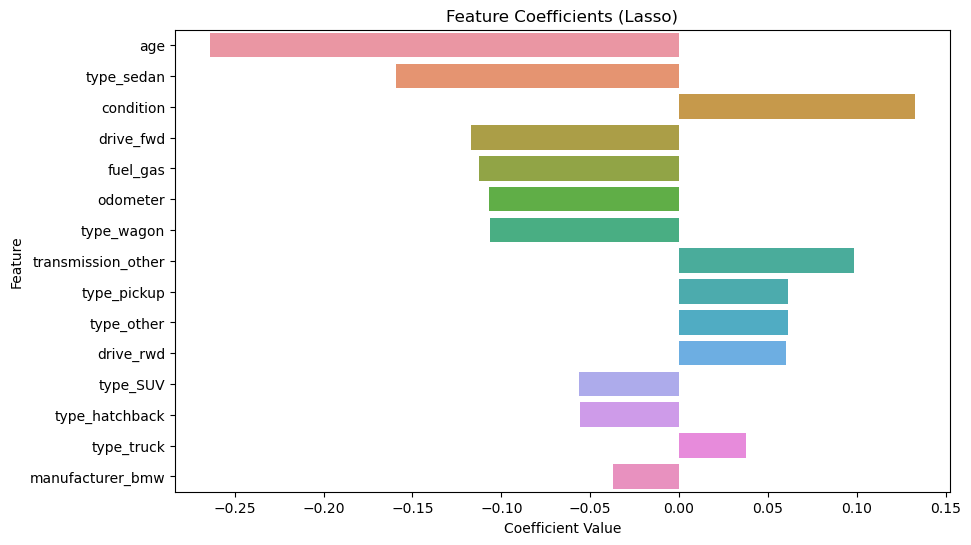

In [200]:
top_15_coeff_lasso = coeff_lasso_df.head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x = 'coef', y = 'feature_names', data = top_15_coeff_lasso, orient = 'h')
plt.title('Feature Coefficients (Lasso)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [201]:
# Examining Feature Importance
perm_importance = permutation_importance(best_estimator_lasso, X_train, y_train, n_repeats=10, random_state=42)

# Get the feature importances
feature_importances_lasso = perm_importance.importances_mean

# Get the indices of features sorted by importance
sorted_idx = np.argsort(feature_importances_lasso)[::-1]

# Create dataframe for feature and corresponding importance value
lasso_feature_importance_df = pd.DataFrame({'Feature': X.columns[sorted_idx],
                                      'Importance': feature_importances_lasso[sorted_idx]})

# 3. Ridge Regression with GridSearch CV

In [202]:
# Specifying alpha values to try out when using GridSearchCV
# Using np.logspace to generate range of values since log transformation was applied to target variable
ridge_param_dict = {'ridge__alpha': np.logspace(0, 5, 50)}
#param_dict = {'ridge__alpha':[1,10,100,1000]}

#Building a pipeline for the ridge regression
Ridge_Poly3_pipe =  Pipeline([('scaler', StandardScaler()),
                       ('ridge', Ridge())])

# Using GridSearchCV to find the optimal value for alpha in the Ridge regression model
# we include parameter cv = 5 to specify the type of cross-validation to use (k-fold cross-validation)
ridge_grid = GridSearchCV(Ridge_Poly3_pipe, param_grid=ridge_param_dict, cv = 5)
ridge_grid.fit(X_train, y_train)

#Perform ridge regression on the data
train_predict = ridge_grid.predict(X_train)
test_predict = ridge_grid.predict(X_test)

#Regression Error
Ridge3_train_mse = mean_squared_error(train_predict, y_train)
Ridge3_test_mse = mean_squared_error(test_predict, y_test)
Ridge3_train_mae = mean_absolute_error(train_predict, y_train)
Ridge3_test_mae = mean_absolute_error(test_predict, y_test)


print(f"Ridge Degree 3 Model: train_mse={Ridge3_train_mse}, test_mse={Ridge3_test_mse}")
print(f"Ridge Degree 3 Model: train_mae={Ridge3_train_mae}, test_mae={Ridge3_test_mae}")
Ridge_Poly3_pipe

Ridge Degree 3 Model: train_mse=1.2284533405418658, test_mse=1.2757195188549342
Ridge Degree 3 Model: train_mae=0.576321229836817, test_mae=0.5836210979939745


Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [203]:
# extracting best estimator (pipeline)
best_estimator_ridge = ridge_grid.best_estimator_

# extract model step from best estimator
best_model_ridge = best_estimator_ridge.named_steps['ridge']

feature_names = X_train.columns

# extract feature coefficients
coefs_ridge = best_model_ridge.coef_

In [204]:
best_model_ridge

Ridge(alpha=910.2981779915218)

In [205]:
# Assessing model using cross-validation using cross_val_score 
# Setting cv = 5, represents performing 5-fold cross-validation
cv_scores_ridge = cross_val_score(best_model_ridge, X_train, y_train, cv = 5)

mean_cv_score_ridge = np.mean(cv_scores_ridge)

print("Cross-validation scores: ", cv_scores_ridge)
print("Mean cross-validation score: ", mean_cv_score_ridge)

Cross-validation scores:  [0.1969165  0.21513356 0.21260488 0.21951813 0.2195383 ]
Mean cross-validation score:  0.21274227534123166


In [216]:
# Creating dataframe for coefficients
# Adding a third column that views the magnitude of the coefficients, displayed in descending order
coeff_ridge_df = pd.DataFrame.from_dict({'feature_names':feature_names,'coef':coefs_ridge})
coeff_ridge_df['abs_coef'] = abs(coeff_ridge_df.coef)
coeff_ridge_df = coeff_ridge_df.sort_values(by='abs_coef', ascending = False)
coeff_ridge_df.head(50)

,feature_names,coef,abs_coef
3,age,-0.273943,0.273943
0,condition,0.141102,0.141102
72,type_sedan,-0.130352,0.130352
2,odometer,-0.111790,0.111790
75,type_wagon,-0.101385,0.101385
71,type_pickup,0.100010,0.100010
61,drive_fwd,-0.091276,0.091276
62,drive_rwd,0.083111,0.083111
70,type_other,0.081211,0.081211
73,type_truck,0.077014,0.077014


In [219]:
top_15_coeff_ridge = coeff_ridge_df.head(30)

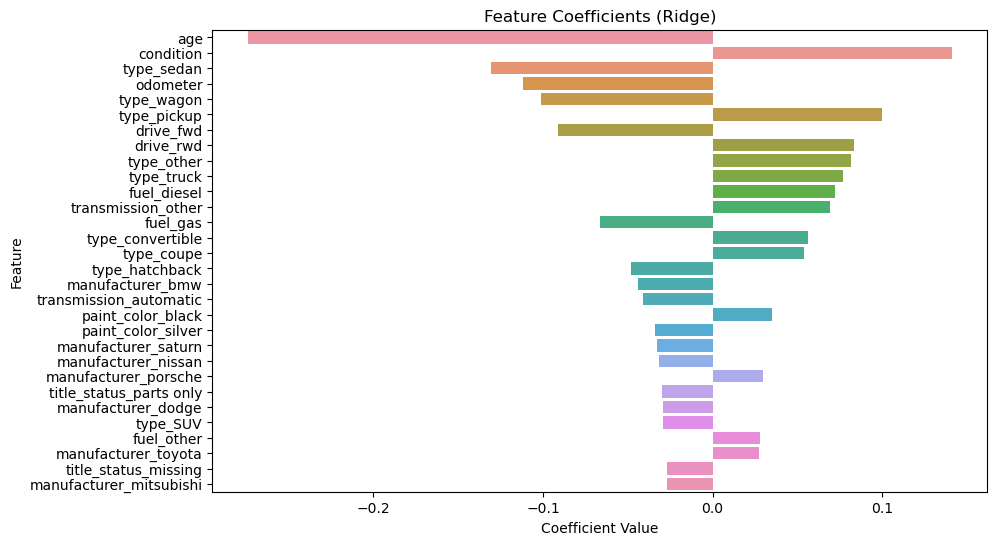

In [220]:
# Visualizing Feature Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x = 'coef', y = 'feature_names', data = top_15_coeff_ridge, orient = 'h')
plt.title('Feature Coefficients (Ridge)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

In [209]:
# Examining Feature Importance
perm_importance = permutation_importance(best_estimator_ridge, X_train, y_train, n_repeats = 10, random_state = 42)

# Get the feature importances
feature_importances_ridge = perm_importance.importances_mean

# Get the indices of features sorted by importance
sorted_idx = np.argsort(feature_importances_ridge)[::-1]

# Create dataframe for feature and corresponding importance value
ridge_feature_importance_df = pd.DataFrame({'Feature': X.columns[sorted_idx],
                                      'Importance': feature_importances_ridge[sorted_idx]})

In [210]:
ridge_feature_importance_df.head(25)

,Feature,Importance
0,age,0.096742
1,condition,0.025259
2,type_sedan,0.022139
3,odometer,0.016145
4,type_pickup,0.013258
5,type_wagon,0.013141
6,drive_fwd,0.010832
7,drive_rwd,0.008792
8,type_other,0.008662
9,type_truck,0.007808


In [211]:
# Create new data frame with top 15 important features
top_15_important_feat_ridge = ridge_feature_importance_df.head(15)

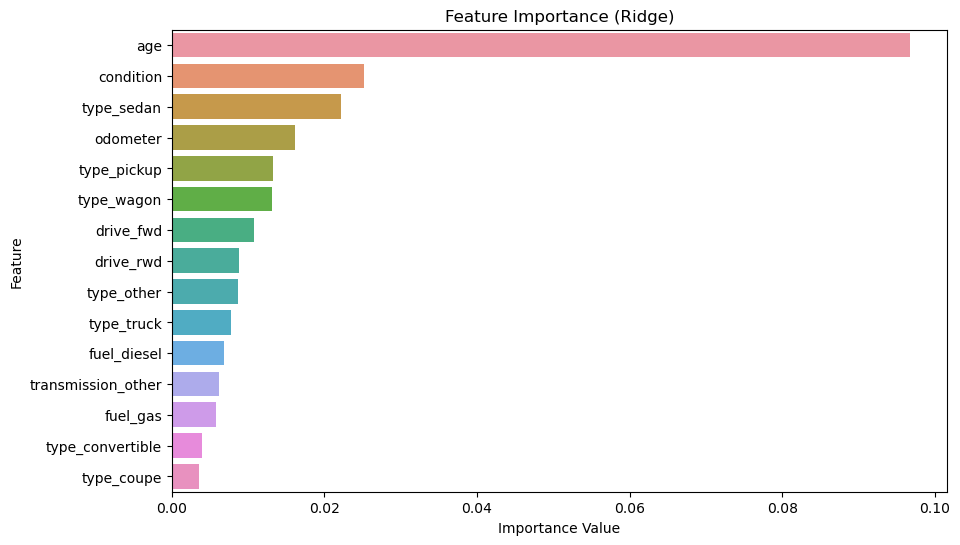

In [212]:
# Visualizing Feature Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x = 'coef', y = 'feature_names', data = top_15_coeff_ridge, orient = 'h')
plt.title('Feature Coefficients (Ridge)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

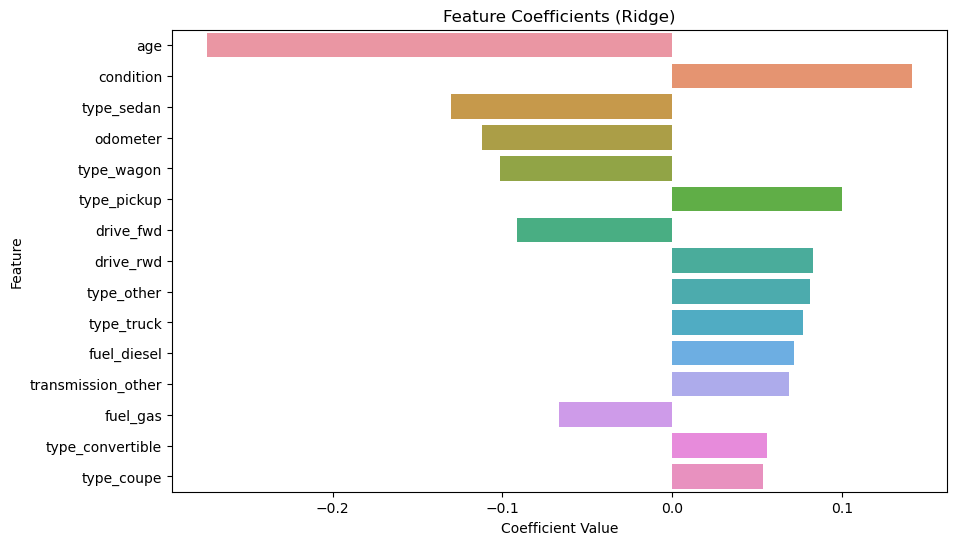

In [214]:
# Visualizing Feature Coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x = 'coef', y = 'feature_names', data = top_15_coeff_ridge, orient = 'h')
plt.title('Feature Coefficients (Ridge)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

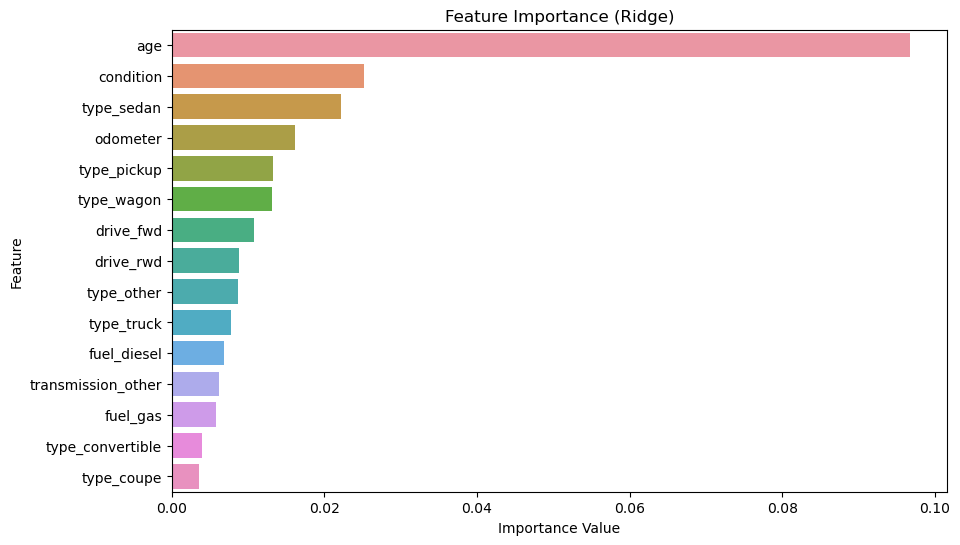

In [215]:
# Visualizing Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Importance', y = 'Feature', data = top_15_important_feat_ridge, orient = 'h')
plt.title('Feature Importance (Ridge)')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.show()

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

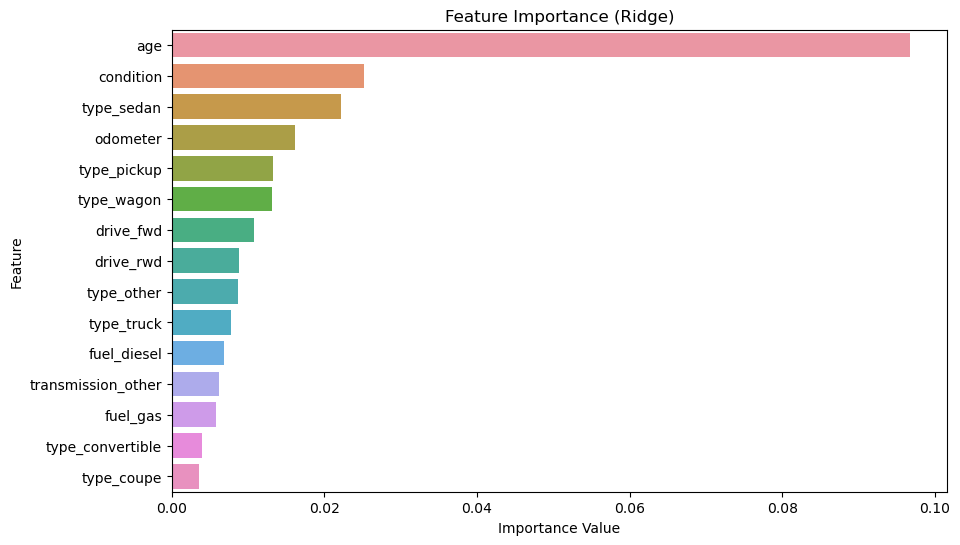

In [218]:
# Visualizing Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Importance', y = 'Feature', data = top_15_important_feat_ridge, orient = 'h')
plt.title('Feature Importance (Ridge)')
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.show()

## To maximize the price at which a vehicle is sold, dealerships should focus in order of importance on the below:


1. Year of the vehicle: Generally, newer vehicles command higher prices in the used car market due to factors like updated features and technology, as well as potentially lower mileage.
2. Condition of the vehicle: Vehicles in excellent or good condition typically fetch higher prices compared to those in fair or poor condition.
3. Type of vehicle: Sedans are popular and often come with a higher price tag in the used car market, followed by pickups and wagons.
4. Odometer: Lower mileage typically translates to a higher price, with each mile increase leading to a decrease in value.
5. Drive type: Rear-wheel drive cars tend to have higher value compared to front-wheel drive cars.
6. Cylinders: Vehicles with larger engines, particularly with 8 or 6 cylinders, are preferred and can command higher prices.
7. Fuel type: Diesel cars generally fetch higher prices, but gas cars are also popular, though typically not as expensive as diesel.
8. Car title: A clean title is essential for maximizing the value of a used car.
9. Manufacturer: Toyota and Honda are popular choices in the used car market, while luxury cars may not sell as easily.


Considering these factors, if you're buying a used car, you'd ideally look for a newer vehicle in excellent condition, with low mileage, rear-wheel drive, a larger engine size (8 or 6 cylinders), and a clean title. Additionally, models from manufacturers like Toyota and Honda would likely be in demand. If selling, highlighting these features could help maximize the price you can ask for your used car.

# Future improvements 

Future improvements for this project would involve  hyperparameter tuning to further improve the results. 
Additionally we could perfrom some more feature engineering to the input dataset and verify if it enables reduction in the error.
Using an imputer to determine Nan values and verify if there is any change in the result.